# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?


In [1]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Se cargan los datos y se cambian los nombres de las columnas

In [2]:
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]

names_features = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)

columns_name = ["".join([c.capitalize() for c in cols.split()]) for cols in df.columns]
columns_name = [col.replace("(", "_") for col in columns_name]
cols = [col.replace(")", "") for col in columns_name]

df.columns = cols
df["Target"] = Y

Ahora se hace la división estratificada y se definen los conjuntos de entrenamiento y prueba:

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Aquí esta vez se dejan todas las features con el -1
X_train = strat_train_set.iloc[:, :-1].values
y_train = strat_train_set["Target"].values

X_test = strat_test_set.iloc[:, :-1].values
y_test = strat_test_set["Target"].values

Lo siguiente es plantear el modelo como un problema multiclase:

In [4]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
log_reg.fit(X_train, y_train)

/Users/camilogomez/anaconda3/envs/huggingface-experiments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Y por último se prueba con el ejemplo dado:

In [5]:
X_new = [[4.9, 5.0, 1.8, 0.3]]

probabilities = log_reg.predict_proba(X_new)

class_names = iris["target_names"]

# Imprimir las probabilidades para cada clase
for class_name, prob in zip(class_names, probabilities[0]):
    print(f"Probabilidad de {class_name}: {prob:.4f}")


Probabilidad de setosa: 0.9993
Probabilidad de versicolor: 0.0007
Probabilidad de virginica: 0.0000


# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas
2. Analizar que pasa con la regularaización.
3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.


Solución:

1. La parte 1 ya fue resuelta en el item anterior.
2. Para analizar el efecto de la regularización, se van a variar los valores de regularización para analizar cómo cambia la precisión de entrenamiento y de prueba ante los distintos valores. Con cada uno de estos valores se usará el mismo conjunto de entrenamiento para que las pruebas sean justas:

/Users/camilogomez/anaconda3/envs/huggingface-experiments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/camilogomez/anaconda3/envs/huggingface-experiments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

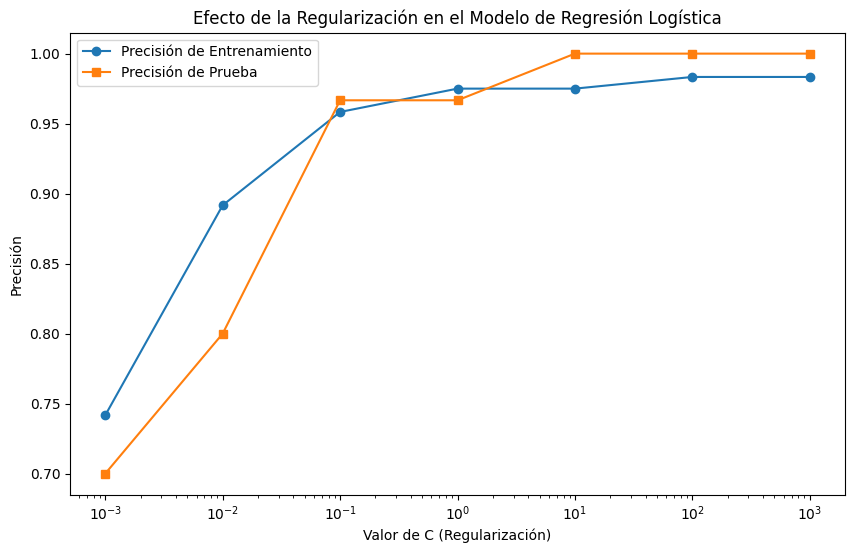

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Valores de regularización para probar
C_values = np.logspace(-3, 3, 7)
train_accuracies = []
test_accuracies = []

for C in C_values:
    # Entrenar modelo con cada valor de C
    log_reg = LogisticRegression(C=C, multi_class="multinomial", solver="lbfgs", max_iter=200)
    log_reg.fit(X_train, y_train)
    
    # Evaluar precisión en entrenamiento y prueba
    train_accuracies.append(log_reg.score(X_train, y_train))
    test_accuracies.append(log_reg.score(X_test, y_test))

# Graficar el efecto de la regularización
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label="Precisión de Entrenamiento", marker='o')
plt.plot(C_values, test_accuracies, label="Precisión de Prueba", marker='s')
plt.xscale("log")
plt.xlabel("Valor de C (Regularización)")
plt.ylabel("Precisión")
plt.title("Efecto de la Regularización en el Modelo de Regresión Logística")
plt.legend()
plt.show()

Mientras mayor es la regularización, la precisión aumenta. Tiene sentido puesto que regularización muy baja significa overfitting.

3. Se crean las curvas de aprendizaje usando códigos de learning_curve del laboratorio 2. Esto consisten en gradualmente aumentar el conjunto de entrenamiento y observar cómo cambia la precisión del modelo al hacerlo:

/Users/camilogomez/anaconda3/envs/huggingface-experiments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/camilogomez/anaconda3/envs/huggingface-experiments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

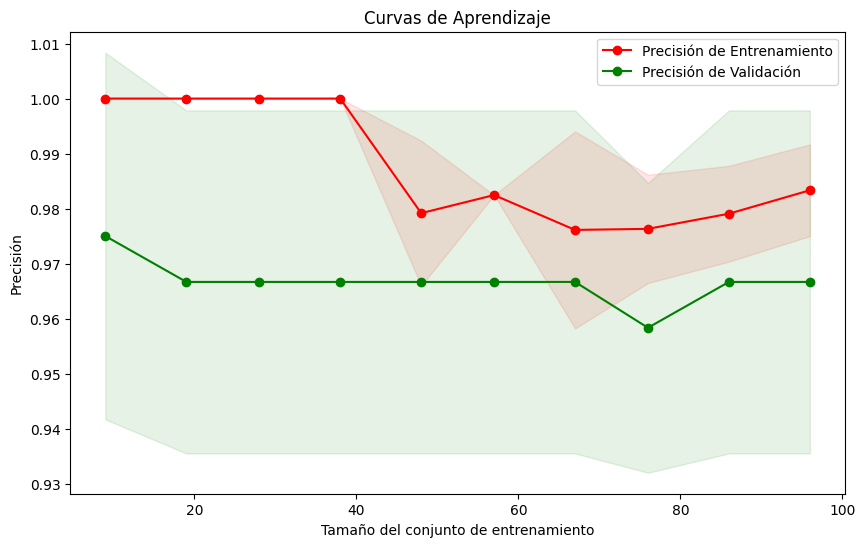

In [7]:
from sklearn.model_selection import learning_curve

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, cv=5, scoring="accuracy", n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Precisión de Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Precisión de Validación")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.show()

4. Para las fronteras de decisión se decide entrenar con solo dos características para que sea más fácil de observar.


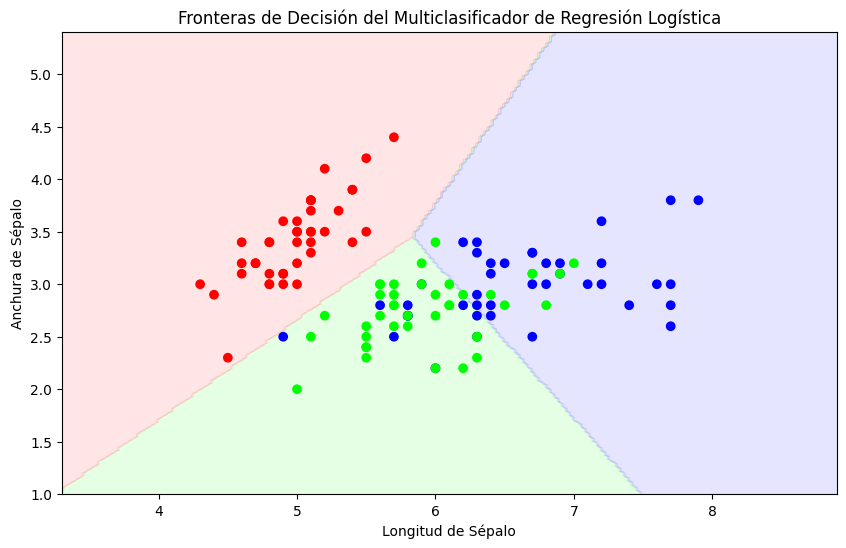

In [8]:
import numpy as np
from matplotlib.colors import ListedColormap

X_2d = X_train[:, :2]
y_2d = y_train

# Entrenar el modelo con las dos primeras características
log_reg_2d = LogisticRegression(C=1, multi_class="multinomial", solver="lbfgs", max_iter=200)
log_reg_2d.fit(X_2d, y_2d)

# Crear un grid para graficar las fronteras de decisión
x0, x1 = np.meshgrid(
    np.linspace(X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1, 200),
    np.linspace(X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1, 200),
)
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_pred_grid = log_reg_2d.predict(X_grid).reshape(x0.shape)

# Graficar las fronteras de decisión
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_pred_grid, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel("Longitud de Sépalo")
plt.ylabel("Anchura de Sépalo")
plt.title("Fronteras de Decisión del Multiclasificador de Regresión Logística")
plt.show()


Allí se puede observar que las características de cierta forma sí están clusterizadas.